# Data Loading and Processing Tutorial #

A big part of the problem in solving machine problems goes to preparing the data. PyTorch provides many tools to make data loading easy to use and easy to read.


In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


In this dataset we are going to deal with facial pose. We show an image as example:
![alt text](https://pytorch.org/tutorials/_images/landmarked_face2.png "Logo Title Text 1")

Over all, 68 different landmark points are annotated for each face.

Let's read the CSV and get the annotations in an array (N,2), where N is the total number of landmarks.

In [8]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')
n = 62
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: britney-bald.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[  52.  134.]
 [  54.  149.]
 [  56.  164.]
 [  60.  179.]]


Let's write a simple helper function to show an image and it's landmarks. We added an exaple of how it works.

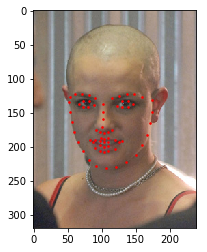

In [9]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),
               landmarks)
plt.show()

## Dataset Class ##

Our custom dataset chold inherit from ``Dataset`` and overide the following methods:

- `__len__` so that `len(dataset)`returns the size of the dataset.
- `__getitem__` to support the indexing such that ``dataset[i]`` can be used to get the ith sample.

Our dataset will be a dict ``{'image': image, 'landmarks': landmarks}`` and will add an option argument transform so that any required processing can be applied on the sample.



In [ ]:
class FaceLandmarksDataset(Dataset):
    """"Face Landmark Dataset"""
    
    def __init__(self,csv_file,root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv (csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.landmarks_frame)
  
        
        